# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [12]:
url = "https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')
print(chipo)

      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clementine]  

### Step 4. See the first 10 entries

In [13]:
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

### Step 5. Create a histogram of the top 5 items bought

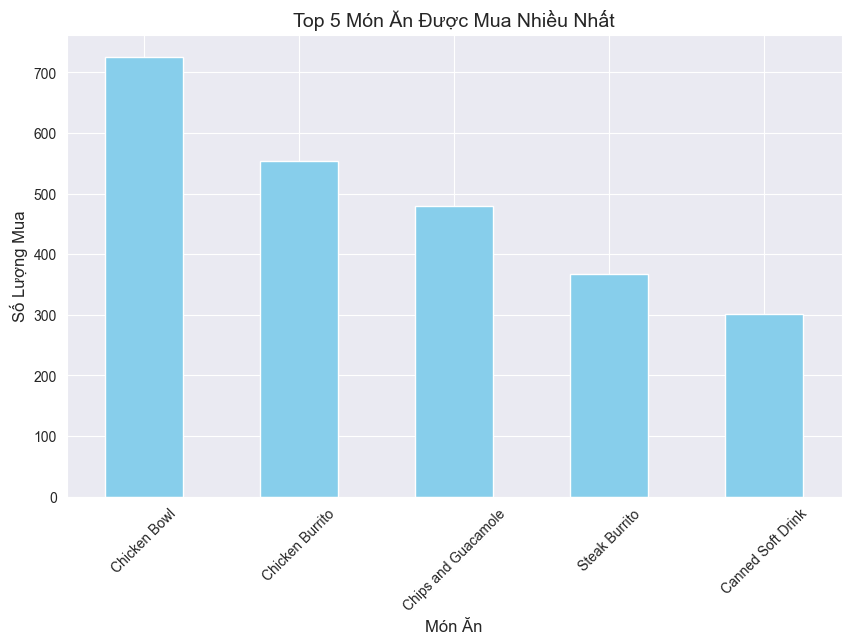

In [14]:
### Bước 5. Tạo histogram của 5 món ăn được mua nhiều nhất

import matplotlib.pyplot as plt

# Tính số lượng mỗi món ăn được mua
top_items = chipo['item_name'].value_counts().head(5)

# Vẽ histogram
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='skyblue')
plt.title('Top 5 Món Ăn Được Mua Nhiều Nhất', fontsize=14)
plt.xlabel('Món Ăn', fontsize=12)
plt.ylabel('Số Lượng Mua', fontsize=12)
plt.xticks(rotation=45)
plt.show()


### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

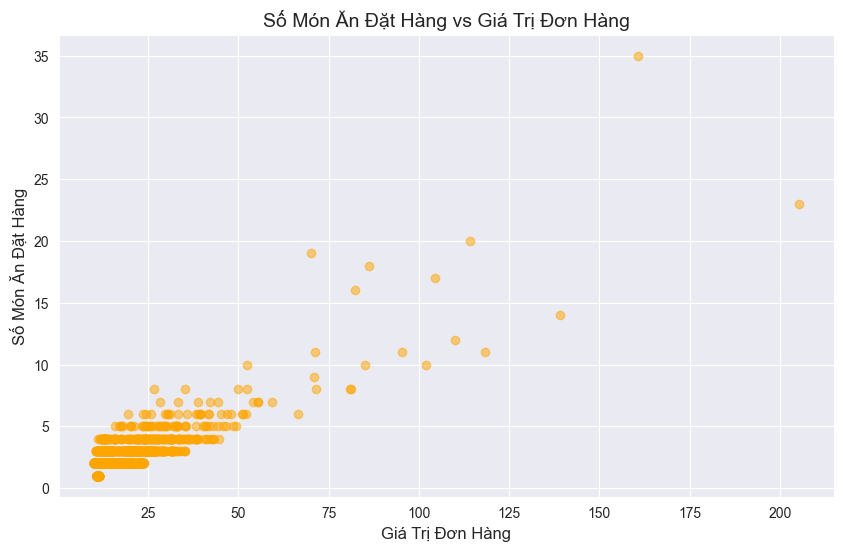

In [17]:
### Bước 6. Tạo scatterplot với số món ăn đã đặt hàng trên giá trị đơn hàng

# Tính số lượng món ăn trong mỗi đơn hàng
items_ordered = chipo.groupby('order_id')['quantity'].sum()

# Giá trị của đơn hàng (cột 'item_price' đã có dấu $ nên cần chuyển thành số)
chipo['item_price'] = chipo['item_price'].replace({'\\$': '', ',': ''}, regex=True).astype(float)

# Tính tổng giá trị mỗi đơn hàng
order_price = chipo.groupby('order_id')['item_price'].sum()

# Vẽ scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(order_price, items_ordered, alpha=0.5, color='orange')
plt.title('Số Món Ăn Đặt Hàng vs Giá Trị Đơn Hàng', fontsize=14)
plt.xlabel('Giá Trị Đơn Hàng', fontsize=12)
plt.ylabel('Số Món Ăn Đặt Hàng', fontsize=12)
plt.show()


### Step 7. BONUS: Create a question and a graph to answer your own question.

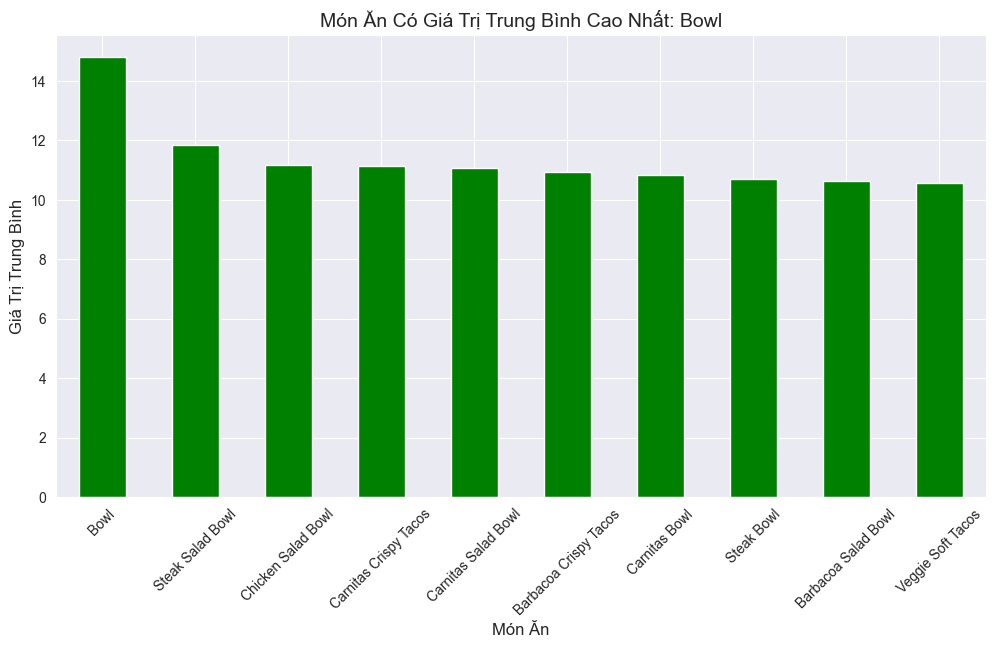

Món ăn có giá trị trung bình cao nhất là: Bowl, với giá trị là: 14.80


In [18]:
### Bước 7. BONUS: Tạo câu hỏi và vẽ biểu đồ để trả lời câu hỏi

# Loại bỏ ký tự '$' và ',' trong giá trị item_price, chuyển sang kiểu float
chipo['item_price'] = chipo['item_price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

# Tính giá trị trung bình của mỗi món ăn
average_item_price = chipo.groupby('item_name')['item_price'].mean()

# Lấy món ăn có giá trị trung bình cao nhất
top_item = average_item_price.idxmax()
top_item_value = average_item_price.max()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
average_item_price.sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title(f'Món Ăn Có Giá Trị Trung Bình Cao Nhất: {top_item}', fontsize=14)
plt.xlabel('Món Ăn', fontsize=12)
plt.ylabel('Giá Trị Trung Bình', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# In ra món ăn có giá trị trung bình cao nhất và giá trị của nó
print(f"Món ăn có giá trị trung bình cao nhất là: {top_item}, với giá trị là: {top_item_value:.2f}")
